# Example 6

Una manera de conseguir una búsqueda más efectiva cuando se emplea un Algoritmo
Evolutivo es dotarlo de operadores con más “inteligencia” que los operadores sencillos de
cruza y mutación.
Resuelva nuevamente el ejemplo 5 incorporando ahora un nuevo operador de mutación a los
operadores usados originalmente, que tome un cromosoma y lo someta a la ejecución de un
algoritmo de Hill Climbing durante 25 iteraciones, devolviendo como resultado de la
“mutación” el mejor valor encontrado.
Informe los nuevos resultados obtenidos y compárelos con los del ejercicio 5, realizando la
misma cantidad de ejecuciones independientes.

´´´
Implemente un Algoritmo Evolutivo que, dadas las siguientes funciones, busque cumplir con el objetivo propuesto para cada una de ellas.

a) Para f 1(x , y)=0.5 x2+y2−x y−2 x−6 y , con −5⩽x⩽5, −10⩽y⩽10 , buscar donde se encuentra el mínimo de esta función.

b) Para f 2(x)=∑|xi|(i+1) , con x=(x1, x2,..., xn) y n=4 , buscar x tal que f 2(x)=0 , i=1

sabiendo que −1⩽x1⩽1 , −0,8⩽x2⩽1,2 , −0,5⩽x3⩽0,75 y −1,4⩽x4⩽0,5 .

En cada uno de los puntos, detalle:

i. El tipo y forma del cromosoma.

ii. Los operadores genéticos usados.

iii. Los parámetros empleados para la ejecución del algoritmo.

Para asegurarse de haber obtenido resultados consistentes, realice 10 ejecuciones independientes e informe los mejores resultados encontrados en cada ejecución junto con su  tness y la cantidad de generaciones que se necesitaron para obtenerlos.
´´´

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
import mpld3

%matplotlib inline
mpld3.enable_notebook()

from utils.busqueda_local import hill_climb
from deap import base, creator, tools, algorithms

In [2]:
# -*- coding: utf-8 -*-
"""
Example 6: Optimización numérica
"""

def F_1(x, y):
    return 0.5 * x ** 2 + y ** 2 - x * y - 2 * x - 6 * y


def F_2(x):
##    return sum(abs(x) ** (2, 3, 4, 5))
    tot=0
    for i in range(len(x)):
        aux = abs(x[i])
        tot+= aux ** (i+1)
    return tot


# Parte a)

## Fitness

In [3]:
creator.create("Fitness", base.Fitness, weights=(-9999,))
creator.create("Individual", list, fitness=creator.Fitness)

## Individuo

In [4]:
def nuevoPar():
    x=round(-5 + np.random.random() * (5 - -5), 2)
    y=round(-10 + np.random.random() * (10 - -10), 2)
    return [x,y]

In [5]:
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, nuevoPar)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

## Evaluacion, cruza, mutacion y seleccion

In [6]:
def evaluarADN(x):
    return [F_1(*x)]

In [7]:
MAX_ITERATIONS = 25
def vecinosMutantes(x):
    v = []
    nuevoX = x[0] + np.random.uniform(low=-0.1, high=0.1)
    if abs(nuevoX) > abs(5):
        nuevoX = x[0]
    nuevoY = x[1] + np.random.uniform(low=-0.1, high=0.1)
    if abs(nuevoY) > abs(10):
        nuevoY = x[1]
    v.append([nuevoX, x[1]])
    v.append([x[0], nuevoY])
    return v

def mutateHillClimbing(x, indpb=0.5):
    doit = np.random.uniform(0,1)
    toolbox.individual()
    if (doit < indpb):
        for i in range(MAX_ITERATIONS):
            x, evaluaciones = hill_climb(x, evaluarADN, vecinosMutantes)
        return creator.Individual(x),
    return x,

In [8]:
toolbox.register("evaluate", evaluarADN)
toolbox.register("mate", tools.cxOnePoint)
#toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.50)
toolbox.register("mutate", mutateHillClimbing, indpb=0.50)
toolbox.register("select", tools.selTournament, tournsize=5)

## Find Best Solution

In [9]:
def main():    
    GENERACIONES=50
    pop = toolbox.population(n=1000)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=GENERACIONES, stats=stats, halloffame=hof, verbose=True)
    return pop, logbook, hof

gen	nevals	avg    	min    	max    
0  	1000  	38.9587	-26.711	206.619
1  	611   	-2.13629	-27.6061	107.783
2  	597   	-18.1206	-27.6202	55.3309
3  	588   	-23.653 	-27.714 	30.6573
4  	602   	-24.9152	-27.723 	9.13789
5  	596   	-26.1929	-27.723 	2.95298
6  	585   	-26.0648	-27.723 	11.8168
7  	662   	-25.9594	-27.723 	10.5341
8  	582   	-26.1592	-27.723 	7.53892
9  	597   	-25.6963	-27.723 	10.7297
10 	648   	-25.9336	-27.723 	10.6423
11 	593   	-25.9894	-27.723 	15.4766
12 	636   	-25.9672	-27.723 	12.2091
13 	571   	-25.9859	-27.723 	8.76267
14 	596   	-25.9593	-27.723 	12.6259
15 	610   	-26.1735	-27.723 	11.8736
16 	578   	-26.0456	-27.723 	17.3241
17 	587   	-26.2004	-27.723 	7.29894
18 	608   	-25.9559	-27.723 	7.20156
19 	582   	-25.9841	-27.723 	24.9332
20 	570   	-26.298 	-27.723 	8.45426
21 	583   	-25.7038	-27.723 	20.5345
22 	560   	-26.0994	-27.723 	13.1398
23 	579   	-26.0087	-27.723 	6.22897
24 	582   	-26.1582	-27.723 	12.2196
25 	622   	-26.0968	-27.723 	20.5909
26 	5

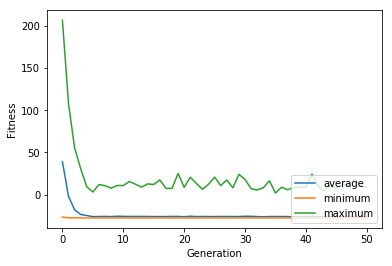

In [10]:
if __name__ == "__main__":
    pop, log, hof = main()
    print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))
    gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
    plt.plot(gen, avg, label="average")
    plt.plot(gen, min_, label="minimum")
    plt.plot(gen, max_, label="maximum")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend(loc="lower right")

### From Example 5:
Best individual is: [8.61, 6.74]
with fitness: (-33.19774999999999,)

# Parte B)

## Fitness

In [16]:
creator.create("Fitness2", base.Fitness, weights=(-0.01,))
creator.create("Individual2", list, fitness=creator.Fitness)

## Individuo

In [17]:
def nuevoGEN():
    v=[]
    v.append(round(-1 + np.random.random() * (1 - -1), 3))
    v.append(round(-0.8 + np.random.random() * (1.2 - -0.8), 3))
    v.append(round(-0.5 + np.random.random() * (0.75 - -0.5), 3))
    v.append(round(-1.4 + np.random.random() * (0.5 - -1.4), 3))
    return v

In [19]:
toolbox = base.Toolbox()
toolbox.register("individual2", tools.initIterate, creator.Individual, nuevoGEN)
toolbox.register("population2", tools.initRepeat, list, toolbox.individual2)

## Evaluacion, cruza, mutacion y seleccion

In [20]:
def evaluarADN2(x):
    return [F_2(x)]

In [29]:
MAX_ITERATIONS = 25
def buildNeighbour(x, inf_limit, max_limit):
    nuevoX = x + np.random.uniform(low=-0.1, high=0.1)
    if nuevoX > max_limit or nuevoX < inf_limit:
        nuevoX = x
    return nuevoX

def vecinosMutantes2(x):
    v = []
    v.append([buildNeighbour(x[0],-1,1), x[1], x[2], x[3]])
    v.append([x[0], buildNeighbour(x[1],-0.8,1.2), x[2], x[3]])
    v.append([x[0], x[1], buildNeighbour(x[2],-0.5,0.75), x[3]])
    v.append([x[0], x[1], x[2], buildNeighbour(x[3],-1.4,0.5)])
    return v

def mutateHillClimbing2(x, indpb=0.5):
    doit = np.random.uniform(0,1)
    if (doit < indpb):
        for i in range(MAX_ITERATIONS):
            x, evaluaciones = hill_climb(x, evaluarADN2, vecinosMutantes2)
        return creator.Individual2(x),
    return x,

In [30]:
toolbox.register("evaluate", evaluarADN2)
toolbox.register("mate", tools.cxTwoPoint)
#toolbox.register("mutate", tools.mutGaussian, indpb=0.50, mu=0.01, sigma=0.3)
toolbox.register("mutate", mutateHillClimbing2, indpb=0.50)
toolbox.register("select", tools.selRoulette)

In [31]:
def main():    
    GENERACIONES=30
    pop = toolbox.population2(n=1000)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=GENERACIONES, stats=stats, halloffame=hof, verbose=True)
    return pop, logbook, hof

gen	nevals	avg    	min      	max    
0  	1000  	1.52918	0.0339358	5.82674
1  	577   	2.56945	0.0479303	6.68486
2  	597   	3.94525	0.176977 	6.68726
3  	578   	4.90404	0.653244 	6.68726
4  	597   	5.45312	1.17543  	6.69349
5  	607   	5.80781	1.78427  	6.69192
6  	657   	5.99623	2.71011  	6.69337
7  	549   	6.14043	3.43282  	6.69337
8  	568   	6.22101	3.14266  	6.69781
9  	610   	6.30142	4.00318  	6.69722
10 	596   	6.33866	4.00318  	6.69792
11 	628   	6.37581	2.98029  	6.69926
12 	597   	6.40112	2.96974  	6.70059
13 	598   	6.43133	4.50629  	6.69866
14 	587   	6.44747	4.50629  	6.6987 
15 	584   	6.48083	4.50629  	6.69971
16 	590   	6.48661	4.83697  	6.69981
17 	557   	6.49402	4.83637  	6.69971
18 	641   	6.52999	3.88641  	6.7018 
19 	613   	6.55271	5.00162  	6.7018 
20 	630   	6.57464	5.49181  	6.7018 
21 	551   	6.58572	5.49181  	6.7018 
22 	561   	6.5962 	5.49181  	6.70085
23 	574   	6.60617	5.49181  	6.70085
24 	582   	6.60973	5.49181  	6.70109
25 	579   	6.61594	5.78816  	6.70054
2

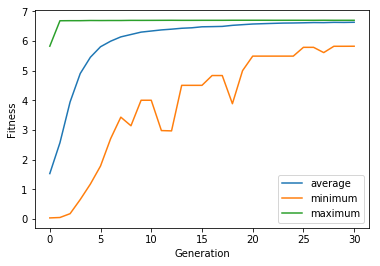

In [32]:
if __name__ == "__main__":
    pop, log, hof = main()
    print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))
    gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
    plt.plot(gen, avg, label="average")
    plt.plot(gen, min_, label="minimum")
    plt.plot(gen, max_, label="maximum")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend(loc="lower right")

### From Example 5
Best individual is: [-0.03, -0.18]
with fitness: (0.0624,)